In [104]:
import os
import pandas as pd
path = "./Data2"
dir_list = os.listdir(path)
allData = [file for file in dir_list if "-" in file and ".csv" in file]
allData.remove("2000-2001.csv")
df = pd.DataFrame()

# cols = ["B365H","B365D","B365A","BSH","BSD","BSA","BWH","BWD","BWA","GBH","GBD","GBA","IWH","IWD","IWA","LBH","LBD","LBA","PSH","PSD","PSA","SOH","SOD","SOA","SBH","SBD","SBA","SJH","SJD","SJA","SYH","SYD","SYA","VCH","VCD","VCA","WHH","WHD","WHA"]

# cols = ["HomeTeam","AwayTeam","FTR","Date","B365H","B365D","B365A","BWH","BWD","BWA","IWH","IWD","IWA","PSH","PSD","PSA","WHH","WHD","WHA","VCH","VCD","VCA"]
cols = ["HomeTeam","AwayTeam","FTR","Date","B365H","B365D","B365A"]
# cols = ["HomeTeam","AwayTeam","FTR","Date","WHH","WHD","WHA"]
for file in allData:
    pathFile = os.path.join(path,file)
    try:
        data = pd.read_csv(pathFile,error_bad_lines=False,usecols = cols)
        data['Date']= pd.to_datetime(data['Date'])
        df = df.append(data)
    except:
        print(file)
start_date = "2000-01-01"
end_date = "2021-12-31"
mask = (df['Date'] > start_date) & (df['Date'] <= end_date)
df = df.loc[mask]
df['Date']= pd.to_datetime(df['Date'])
df

,Date,HomeTeam,AwayTeam,FTR,B365H,B365D,B365A
0,2002-08-17,Blackburn,Sunderland,D,1.727,3.25,4.333
1,2002-08-17,Charlton,Chelsea,A,2.800,3.25,2.200
2,2002-08-17,Everton,Tottenham,D,2.250,3.25,2.750
3,2002-08-17,Fulham,Bolton,H,1.727,3.25,4.333
4,2002-08-17,Leeds,Man City,H,1.667,3.40,4.500
...,...,...,...,...,...,...,...
179,2021-01-19,West Ham,West Brom,H,1.570,4.20,5.500
180,2021-01-19,Leicester,Chelsea,H,2.870,3.40,2.450
181,2021-01-20,Man City,Aston Villa,H,1.220,6.50,12.000
182,2021-01-20,Fulham,Man United,A,6.000,4.33,1.530


In [105]:
df = df.dropna()

In [106]:
from sklearn.model_selection import train_test_split

X = df.drop(["HomeTeam","AwayTeam","FTR"],axis = 1)

y = df["FTR"]

X_trainDate, X_testDate, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
X_train = X_trainDate.drop(["Date"],axis =1 )
X_test = X_testDate.drop(["Date"],axis =1 )

In [107]:
# from sklearn.model_selection import GridSearchCV
# from sklearn.ensemble import RandomForestClassifier
# from sklearn.model_selection import RandomizedSearchCV
# import numpy as np
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 200, stop = 2000, num = 10)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
# max_depth.append(None)
# # Minimum number of samples required to split a node
# min_samples_split = [2, 5, 10]
# # Minimum number of samples required at each leaf node
# min_samples_leaf = [1, 2, 4]
# # Method of selecting samples for training each tree
# bootstrap = [True, False]
# # Create the random grid
# param_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split,
#                'min_samples_leaf': min_samples_leaf,
#                'bootstrap': bootstrap}

# rfc=RandomForestClassifier(random_state=42)
# # CV_rfc = GridSearchCV(estimator=rfc, param_grid=param_grid, cv= 5,n_jobs= -1, verbose = True)
# # CV_rfc.fit( X_train,y_train)


# rf_random = RandomizedSearchCV(estimator = rfc, param_distributions = param_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
# # Fit the random search model
# rf_random.fit(X_train,y_train)

In [108]:
# clf = rf_random.best_estimator_
# rf_random.best_estimator_

clf = RandomForestClassifier(max_depth=10, min_samples_leaf=4, min_samples_split=5,
                       n_estimators=200, random_state=42)

In [109]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import RandomForestClassifier
# clf = RandomForestClassifier(max_depth=10, max_features='sqrt', min_samples_leaf=4, n_estimators=1600, random_state=42)
scores = cross_val_score(clf, X_train,y_train, cv=3)
scores

array([0.53353846, 0.52369231, 0.52339901])

In [110]:
clf.fit(X_train,y_train)
clf.score(X_train,y_train)

0.5822732868280673

In [111]:
import pickle
filename = 'Selenium Crawler/finalized_model.sav'
pickle.dump(clf, open(filename, 'wb'))

In [112]:
import numpy as np
predictProba =[]
Proba = []
for el in clf.predict_proba(X_train):
  choose = max(el)
  indexChoice = list(el).index(choose)

  if indexChoice == 0:
    predictProba.append("A")
  if indexChoice == 1:
    predictProba.append("D")
  if indexChoice == 2:
    predictProba.append("H")
  
  Proba.append(choose)

In [113]:
X_trainDate["bet"] = predictProba
X_trainDate["Proba"] = Proba
X_trainDate["FTR"] = y_train
X_trainDate["result"] = X_trainDate["bet"] == X_trainDate["FTR"]
X_trainDate

,Date,B365H,B365D,B365A,bet,Proba,FTR,result
248,2017-12-02,2.40,3.30,3.250,H,0.387636,H,True
272,2013-03-04,2.20,3.25,3.200,H,0.456305,H,True
295,2003-03-15,2.20,3.25,2.800,H,0.488740,A,False
40,2004-11-09,3.75,3.50,1.909,A,0.404074,D,False
152,2008-06-12,2.60,3.20,2.800,H,0.398575,D,False
...,...,...,...,...,...,...,...,...
379,2015-05-24,3.50,3.60,2.150,A,0.426962,H,False
34,2015-08-29,1.20,8.00,15.000,H,0.861640,H,True
198,2016-03-01,3.80,3.50,2.100,A,0.542900,A,True
189,2007-01-04,6.50,3.50,1.570,A,0.542998,A,True


In [114]:
def AddKellyCriterion(row):
  bet = row["bet"]
  if bet == "H":
    odd = row["B365H"]
  elif bet == "D": 
    odd = row["B365D"] 
  else: 
    odd = row["B365A"]


  B = odd - 1
  P = row["Proba"]
  Q = 1- P
  row["Kelly"] = (B*P - Q)/B

  return row

X_trainDate = X_trainDate.apply(AddKellyCriterion,axis =1)
X_trainDate

,Date,B365H,B365D,B365A,bet,Proba,FTR,result,Kelly
248,2017-12-02,2.40,3.30,3.250,H,0.387636,H,True,-0.049767
272,2013-03-04,2.20,3.25,3.200,H,0.456305,H,True,0.003226
295,2003-03-15,2.20,3.25,2.800,H,0.488740,A,False,0.062691
40,2004-11-09,3.75,3.50,1.909,A,0.404074,D,False,-0.251510
152,2008-06-12,2.60,3.20,2.800,H,0.398575,D,False,0.022684
...,...,...,...,...,...,...,...,...,...
379,2015-05-24,3.50,3.60,2.150,A,0.426962,H,False,-0.071332
34,2015-08-29,1.20,8.00,15.000,H,0.861640,H,True,0.169838
198,2016-03-01,3.80,3.50,2.100,A,0.542900,A,True,0.127355
189,2007-01-04,6.50,3.50,1.570,A,0.542998,A,True,-0.258759


In [115]:
print(len(X_trainDate[X_trainDate["Kelly"] > 0])/len(X_trainDate))
X_trainDate = X_trainDate[X_trainDate["Kelly"] > 0]
X_trainDate = X_trainDate.sort_values(by=['Date',"Kelly"],ascending = [True,False])
X_trainDate

0.512105047189167


,Date,B365H,B365D,B365A,bet,Proba,FTR,result,Kelly
348,2001-05-04,1.360,4.33,9.00,H,0.770068,D,False,0.131369
352,2001-05-04,2.620,3.40,2.50,D,0.376977,H,False,0.117384
354,2001-05-04,2.500,3.40,2.62,A,0.415703,H,False,0.055025
353,2001-05-04,2.200,3.25,3.20,H,0.456305,D,False,0.003226
101,2001-11-03,5.500,3.60,1.57,A,0.675223,A,True,0.105439
...,...,...,...,...,...,...,...,...,...
162,2021-03-01,3.000,3.70,2.20,A,0.492703,A,True,0.069955
288,2021-03-04,2.600,3.10,2.70,H,0.479437,H,True,0.154085
164,2021-12-01,2.450,3.10,3.10,H,0.472309,H,True,0.108385
166,2021-12-01,2.450,3.10,3.10,H,0.472309,A,False,0.108385


In [116]:
import numpy as np
def softmax(vector):
	e = np.exp(vector)
	return e / e.sum()
 
doneList = []
betDatePortion = []
odds = []
for row in X_trainDate.iterrows():

  bet = row[1]["bet"]
  if bet == "H":
    odd = row[1]["B365H"]
  elif bet == "D":
    odd = row[1]["B365D"]
  else:
    odd = row[1]["B365A"]
  odds.append(odd)

  date = row[1]["Date"]
  if date in doneList:
    continue
  data = X_trainDate[X_trainDate["Date"] == date]
  
  if len(data) == 1:
    betDatePortion.append(row[1]["Kelly"])
  else:
    for i in softmax(data["Kelly"]):
      betDatePortion.append(i)

  doneList.append(date)
  
X_trainDate["betDatePortion"] = betDatePortion
X_trainDate["odd"] = odds
X_trainDate

,Date,B365H,B365D,B365A,bet,Proba,FTR,result,Kelly,betDatePortion,odd
348,2001-05-04,1.360,4.33,9.00,H,0.770068,D,False,0.131369,0.263690,1.360
352,2001-05-04,2.620,3.40,2.50,D,0.376977,H,False,0.117384,0.260028,3.400
354,2001-05-04,2.500,3.40,2.62,A,0.415703,H,False,0.055025,0.244308,2.620
353,2001-05-04,2.200,3.25,3.20,H,0.456305,D,False,0.003226,0.231975,2.200
101,2001-11-03,5.500,3.60,1.57,A,0.675223,A,True,0.105439,0.263129,1.570
...,...,...,...,...,...,...,...,...,...,...,...
162,2021-03-01,3.000,3.70,2.20,A,0.492703,A,True,0.069955,0.069955,2.200
288,2021-03-04,2.600,3.10,2.70,H,0.479437,H,True,0.154085,0.154085,2.600
164,2021-12-01,2.450,3.10,3.10,H,0.472309,H,True,0.108385,0.500000,2.450
166,2021-12-01,2.450,3.10,3.10,H,0.472309,A,False,0.108385,0.500000,2.450


In [117]:
budgetList =[]
amountList = []

budget = 1
countAdd = 0
countWithDrawal = 0
WithDrawLimit = 10
WithDrawalList = []
for date in doneList:
  data = X_trainDate[X_trainDate["Date"] == date]
  gain = sum(data["betDatePortion"]*budget*data["result"]*(data["odd"]-1))
  lost = -sum((data["result"] == False)*data["betDatePortion"]*budget)
  budget = budget + lost + gain
  budgetList.append(budget)
  amountList.append(lost + gain)
  if budget < 1:
    budget = 1
    countAdd +=1
  if budget > WithDrawLimit:
    WithDrawalList.append(budget - (budget % WithDrawLimit))
    budget = (budget % WithDrawLimit)
    countWithDrawal +=1
    

In [118]:
countAdd

123

In [119]:
countWithDrawal

120

<AxesSubplot:>

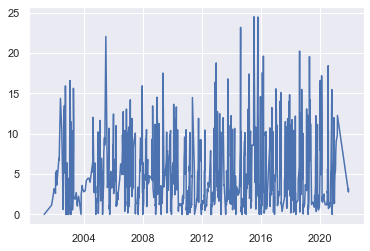

In [120]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(x=doneList, y=budgetList)

# print("Mean " ,mean(budgetTrack))
# print("Std " ,budgetTrack.std())

In [121]:
budget - countAdd*10 + sum(WithDrawalList)

23.174990577972267

In [122]:
# ----------------------------------------------------------------------------------------------------------

In [123]:
import numpy as np
predictProba =[]
Proba = []
for el in clf.predict_proba(X_test):
  choose = max(el)
  indexChoice = list(el).index(choose)

  if indexChoice == 0:
    predictProba.append("A")
  if indexChoice == 1:
    predictProba.append("D")
  if indexChoice == 2:
    predictProba.append("H")
  
  Proba.append(choose)

In [124]:
X_testDate["bet"] = predictProba
X_testDate["Proba"] = Proba
X_testDate["FTR"] = y_test
X_testDate["result"] = X_testDate["bet"] == X_testDate["FTR"]
X_testDate

,Date,B365H,B365D,B365A,bet,Proba,FTR,result
106,2017-05-11,2.50,3.20,3.20,H,0.367117,H,True
249,2016-07-02,2.15,3.30,3.90,H,0.537942,D,False
43,2013-09-21,2.40,3.40,3.20,H,0.442983,A,False
17,2011-08-21,2.38,3.25,3.10,H,0.513826,H,True
83,2013-10-26,1.33,5.50,11.00,H,0.832591,H,True
...,...,...,...,...,...,...,...,...
117,2009-11-03,2.75,3.20,2.37,D,0.390433,A,False
199,2012-11-01,1.53,3.80,7.00,H,0.599373,H,True
187,2013-12-29,1.83,3.70,4.75,H,0.611556,H,True
247,2003-01-29,2.50,3.20,2.50,A,0.487094,H,False


In [125]:
def AddKellyCriterion(row):
  bet = row["bet"]
  if bet == "H":
    odd = row["B365H"]
  elif bet == "D": 
    odd = row["B365D"] 
  else: 
    odd = row["B365A"]


  B = odd - 1
  P = row["Proba"]
  Q = 1- P
  row["Kelly"] = (B*P - Q)/B

  return row

X_testDate = X_testDate.apply(AddKellyCriterion,axis =1)
X_testDate

,Date,B365H,B365D,B365A,bet,Proba,FTR,result,Kelly
106,2017-05-11,2.50,3.20,3.20,H,0.367117,H,True,-0.054805
249,2016-07-02,2.15,3.30,3.90,H,0.537942,D,False,0.136152
43,2013-09-21,2.40,3.40,3.20,H,0.442983,A,False,0.045114
17,2011-08-21,2.38,3.25,3.10,H,0.513826,H,True,0.161527
83,2013-10-26,1.33,5.50,11.00,H,0.832591,H,True,0.325289
...,...,...,...,...,...,...,...,...,...
117,2009-11-03,2.75,3.20,2.37,D,0.390433,A,False,0.113357
199,2012-11-01,1.53,3.80,7.00,H,0.599373,H,True,-0.156528
187,2013-12-29,1.83,3.70,4.75,H,0.611556,H,True,0.143551
247,2003-01-29,2.50,3.20,2.50,A,0.487094,H,False,0.145157


In [126]:
print(len(X_testDate[X_testDate["Kelly"] > 0])/len(X_testDate))
X_testDate = X_testDate[X_testDate["Kelly"] > 0]
X_testDate = X_testDate.sort_values(by=['Date',"Kelly"],ascending = [True,False])
X_testDate

0.5237302248126561


,Date,B365H,B365D,B365A,bet,Proba,FTR,result,Kelly
100,2001-11-03,4.500,3.40,1.720,A,0.670532,A,True,0.212938
35,2002-01-09,3.000,3.00,2.250,D,0.495085,D,True,0.242628
34,2002-01-09,2.500,3.00,2.625,H,0.416563,H,True,0.027605
156,2002-01-12,2.300,3.20,2.700,H,0.469032,A,False,0.060596
36,2002-02-09,1.615,3.40,5.000,H,0.669218,D,False,0.131361
...,...,...,...,...,...,...,...,...,...
252,2021-02-04,1.222,5.50,13.000,H,0.879755,D,False,0.338109
163,2021-04-01,5.000,4.33,1.610,A,0.735546,H,False,0.302014
89,2021-10-03,2.500,3.20,2.600,A,0.444168,A,True,0.096773
165,2021-12-01,7.000,4.50,1.450,A,0.762760,A,True,0.235561


In [127]:
import numpy as np
def softmax(vector):
	e = np.exp(vector)
	return e / e.sum()
 
doneList = []
betDatePortion = []
odds = []
for row in X_testDate.iterrows():

  bet = row[1]["bet"]
  if bet == "H":
    odd = row[1]["B365H"]
  elif bet == "D":
    odd = row[1]["B365D"]
  else:
    odd = row[1]["B365A"]
  odds.append(odd)

  date = row[1]["Date"]
  if date in doneList:
    continue
  data = X_testDate[X_testDate["Date"] == date]
  
  if len(data) == 1:
    betDatePortion.append(row[1]["Kelly"])
  else:
    for i in softmax(data["Kelly"]):
      betDatePortion.append(i)

  doneList.append(date)
  
X_testDate["betDatePortion"] = betDatePortion
X_testDate["odd"] = odds
X_testDate

,Date,B365H,B365D,B365A,bet,Proba,FTR,result,Kelly,betDatePortion,odd
100,2001-11-03,4.500,3.40,1.720,A,0.670532,A,True,0.212938,0.212938,1.720
35,2002-01-09,3.000,3.00,2.250,D,0.495085,D,True,0.242628,0.553550,3.000
34,2002-01-09,2.500,3.00,2.625,H,0.416563,H,True,0.027605,0.446450,2.500
156,2002-01-12,2.300,3.20,2.700,H,0.469032,A,False,0.060596,0.060596,2.300
36,2002-02-09,1.615,3.40,5.000,H,0.669218,D,False,0.131361,0.131361,1.615
...,...,...,...,...,...,...,...,...,...,...,...
252,2021-02-04,1.222,5.50,13.000,H,0.879755,D,False,0.338109,0.338109,1.222
163,2021-04-01,5.000,4.33,1.610,A,0.735546,H,False,0.302014,0.302014,1.610
89,2021-10-03,2.500,3.20,2.600,A,0.444168,A,True,0.096773,0.096773,2.600
165,2021-12-01,7.000,4.50,1.450,A,0.762760,A,True,0.235561,0.235561,1.450


In [145]:
budgetList =[]
amountList = []

budget = 10
countAdd = 0
countWithDrawal = 0
WithDrawLimit = 100
WithDrawalList = []
for date in doneList:
  data = X_testDate[X_testDate["Date"] == date]
  gain = sum(data["betDatePortion"]*budget*data["result"]*(data["odd"]-1))
  lost = -sum((data["result"] == False)*data["betDatePortion"]*budget)
  budget = budget + lost + gain
  budgetList.append(budget)
  amountList.append(lost + gain)
  if budget < 1:
    budget = 10
    countAdd +=1
  if budget > WithDrawLimit:
    WithDrawalList.append(budget - (budget % WithDrawLimit))
    budget = (budget % WithDrawLimit)
    countWithDrawal +=1
    

In [146]:
countAdd

52

In [147]:
countWithDrawal

6

<AxesSubplot:>

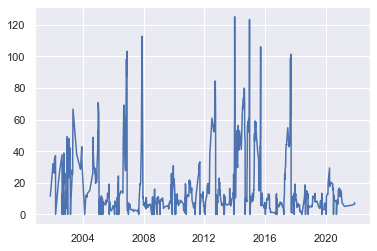

In [148]:
import seaborn as sns
sns.set_theme(style="darkgrid")

sns.lineplot(x=doneList, y=budgetList)

In [149]:
budget - countAdd*10 + sum(WithDrawalList)

87.47205854555273

In [150]:
WithDrawalList

[100.0, 100.0, 100.0, 100.0, 100.0, 100.0]